In [23]:
!pip install tensorflow-datasets



In [24]:
import tensorflow_datasets as tfds 

import tensorflow as tf 
import math
import numpy as np 
import matplotlib.pyplot as plt


In [25]:
ds, md = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLOLY4M/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLOLY4M/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [26]:
type(ds)
# Dictionary

dict

In [27]:
train_ds, test_ds = ds['train'], ds['test']


In [28]:
type(md.splits)
# like Dictionary

tensorflow_datasets.core.splits.SplitDict

In [29]:
md.splits['train'].num_examples


60000

In [30]:
md.splits['test'].num_examples


10000

In [31]:
for img, lbl in train_ds.take(1):
    break
img = img.numpy()


In [32]:
img = img.reshape((28*28))


In [33]:
img
#plt.imshow(img, cmap='gray');

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  77, 227, 227,
       208, 210, 225, 216,  85,  32,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 100,  97,  80,
        57, 117, 227, 238, 115,  49,  78, 106, 108,  71,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 105,  80,
        69,  72,  64,  44,  21,  13,  44,  69,  75,  75,  80, 114,  80,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,  92,
        69,  68,  75,  75,  71,  74,  83,  75,  77,  78,  74,  74,  83,
        77, 108,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        55,  92,  69,  74,  74,  71,  71,  77,  69,  66,  75,  74,  77,
        80,  80,  78,  94,  63,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  63,  95,  66,  68,  72,  72,  69,  72,  74,  74,  74,
        75,  75,  77,  80,  77, 106,  61,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  80, 108,  71,  69,  72,  71,  69,  7

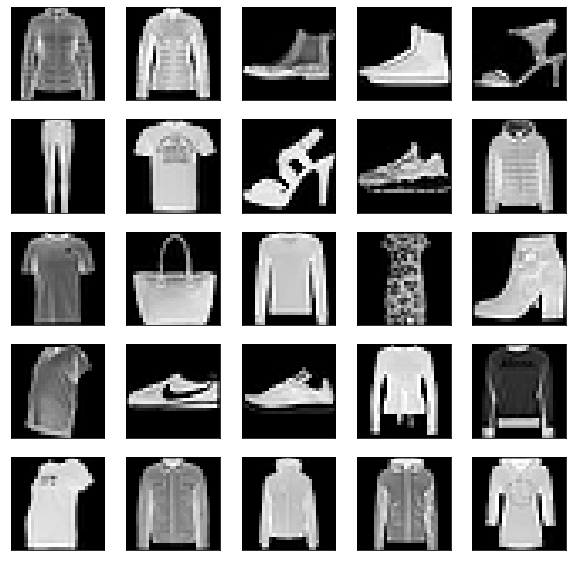

In [34]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_ds.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    #plt.xlabel(class_names[label])
    i += 1
plt.show()

In [35]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
     

        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),


        tf.keras.layers.Dense(10)   # No of classes
    ]
)

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True ),
    metrics=['accuracy']
)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 1,403,210
Trainable params: 1,403,210
Non-trainable params: 0
____________________________________________

In [38]:
bs = 128
train_ds = train_ds.cache().repeat().shuffle(60000).batch(bs)
test_ds = test_ds.cache().batch(bs)


In [39]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_ds =  train_ds.map(normalize)
test_ds  =  test_ds.map(normalize)

train_ds =  train_ds.cache()
test_ds  =  test_ds.cache()

In [40]:
model.fit(train_ds, epochs=18, steps_per_epoch=(math.ceil(60000/bs)))


Epoch 1/18
469/469 [==============================] - 6s 3ms/step - loss: 0.4907 - accuracy: 0.8227
Epoch 2/18
469/469 [==============================] - 2s 3ms/step - loss: 0.3605 - accuracy: 0.8675
Epoch 3/18
469/469 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8802
Epoch 4/18
469/469 [==============================] - 2s 3ms/step - loss: 0.2960 - accuracy: 0.8908
Epoch 5/18
469/469 [==============================] - 2s 3ms/step - loss: 0.2765 - accuracy: 0.8965
Epoch 6/18
469/469 [==============================] - 2s 3ms/step - loss: 0.2626 - accuracy: 0.9012
Epoch 7/18
469/469 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.9055
Epoch 8/18
469/469 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.9085
Epoch 9/18
469/469 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.9130
Epoch 10/18
469/469 [==============================] - 2s 3ms/step - loss: 0.2213 - accuracy: 0.9158

In [41]:
test_loss , test_accuracy = model.evaluate(test_ds, steps = math.ceil(10000/bs))


79/79 [==============================] - 1s 11ms/step - loss: 0.3461 - accuracy: 0.8984
